importing package

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

**loading the train and test data**

In [2]:
df=pd.read_csv('../input/digit-recognizer/train.csv')
test=pd.read_csv('../input/digit-recognizer/test.csv')
df.head(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Checking thetrain and test data value is null or not**

In [3]:
df.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [4]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

**removeing the label or output and stored to y variable**

In [5]:
y=df['label']
df1= df.drop(labels = ["label"],axis = 1) 
df1.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df2 = df1 / 255.0
test1= test / 255.0

reshapeing train and test data

In [7]:
X_train = df2.values.reshape(-1,28,28,1)
test2 = test1.values.reshape(-1,28,28,1)

In [8]:
X_train[1].shape

(28, 28, 1)

**ploting the value**

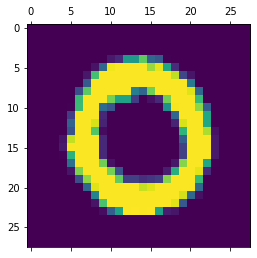

In [9]:
plt.matshow(X_train[1])

In [10]:
y[0]

1

[https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.edureka.co%2Fblog%2Ftensorflow-tutorial%2F&psig=AOvVaw3UvYuQ7iKRvFtab_jqtJi6&ust=1631265549051000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCNCCoPbH8fICFQAAAAAdAAAAABAD](http://)

**flattern the data**

In [11]:
X_train_flattern=X_train.reshape(len(X_train),28*28)
test_flattern=test2.reshape(len(test),28*28)

In [12]:
random_seed=2

split the data into train and test data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train_flattern, y, test_size = 0.1, random_state=random_seed)

In [14]:
import tensorflow as tf

from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [18]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(37800, 784)
(4200, 784)
(37800,)
(4200,)


**train the model using tensorflow**

In [19]:
model1 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, Y_train, epochs=100)

Epoch 1/100
1182/1182 [==============================] - 3s 2ms/step - loss: 0.5361 - accuracy: 0.8465
Epoch 2/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1569 - accuracy: 0.9540
Epoch 3/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1021 - accuracy: 0.9707
Epoch 4/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0731 - accuracy: 0.9782
Epoch 5/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0547 - accuracy: 0.9848
Epoch 6/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0449 - accuracy: 0.9867
Epoch 7/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0325 - accuracy: 0.9908
Epoch 8/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0275 - accuracy: 0.9927
Epoch 9/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0203 - accuracy: 0.9953
Epoch 10/100
1182/1182 [==============================] - 2s 2ms/step - l

**evaluate accuracy and loss**

In [20]:
loss,acc=model1.evaluate(X_val,Y_val)

132/132 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9771


**ploting accurcy using confusion matrix**

Text(69.0, 0.5, 'Truth')

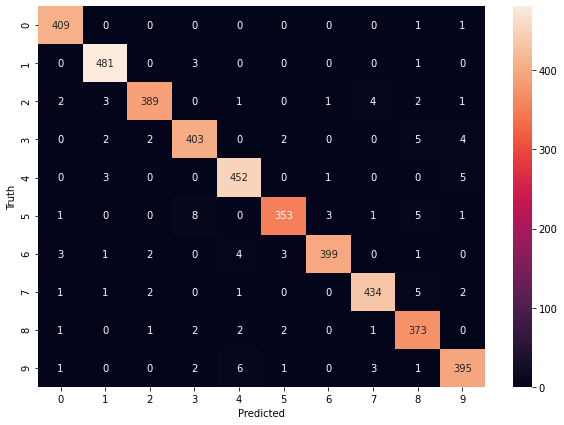

In [21]:
y_predicted = model1.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_val,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
probability_model = tf.keras.Sequential([model1, 
                                         tf.keras.layers.Softmax()])

In [23]:
predition=probability_model.predict(test)

check the value

In [24]:
predition[1]

array([0.23196931, 0.08533675, 0.08533675, 0.08533675, 0.08533675,
       0.08533675, 0.08533675, 0.08533675, 0.08533675, 0.08533675],
      dtype=float32)

select maximum value from the array

In [25]:
np.argmax(predition[1])

0

In [26]:
y[1]

0

**
 Using hidden layer**

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.5318 - accuracy: 0.8499
Epoch 2/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1661 - accuracy: 0.9513
Epoch 3/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1059 - accuracy: 0.9694
Epoch 4/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0776 - accuracy: 0.9779
Epoch 5/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0630 - accuracy: 0.9812
Epoch 6/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0477 - accuracy: 0.9863
Epoch 7/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0374 - accuracy: 0.9893
Epoch 8/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0307 - accuracy: 0.9920
Epoch 9/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0242 - accuracy: 0.9940
Epoch 10/100
1182/1182 [==============================] - 2s 2ms/step - l

In [28]:
model.evaluate(X_val,Y_val)

132/132 [==============================] - 0s 1ms/step - loss: 0.1949 - accuracy: 0.9786


[0.19490946829319, 0.9785714149475098]

In [29]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [30]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("digit1.csv",index=False)